Datacenter initalized!
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step
Simulation initalized!
96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 364ms/step


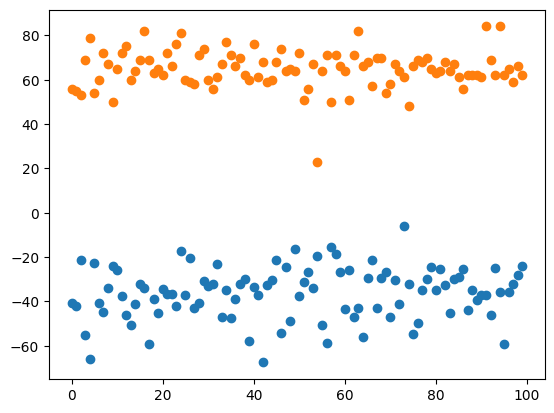

In [1]:
import datetime as dt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from trading_simulator.data_center import DataCenter
from trading_simulator.simulator import Simulator
import time

stocks = ["ETH/USD"]

data_center = DataCenter(stocks, file_name="data_center")
trader_count = 10
starting_cash = 1000

start_date = dt.datetime(2023, 12, 1)
end_date = dt.datetime(2023, 12, 2)
step_time = dt.timedelta(minutes=15)

sim = Simulator(start_date, end_date, step_time, data_center, stocks, trader_count, starting_cash)

progbar = tf.keras.utils.Progbar(sim.get_steps_needed())

times = []
times.append(time.time())

while sim.current_date < sim.stop_date:
    progbar.update(int(np.floor(sim.get_simulation_progress() * sim.get_steps_needed())))
    sim.simualte()
    times.append(time.time())
progbar.update(int(sim.get_steps_needed()))

time_intervals = []
for i in range(2, len(times)):
    time_intervals.append((times[i] - times[i-1]) / trader_count)

trader_profits = []
trader_trade_counts = []
for trader in sim.traders:
    trader_profits.append(trader.get_net_worth() - starting_cash)
    trader_trade_counts.append(len(trader.trades))
x = np.arange(trader_count)
plt.scatter(x, trader_profits)
plt.scatter(x, trader_trade_counts)

# best_trader = sim.get_best_trader()
# x = np.arange(len(time_intervals))
# mean = round(np.mean(time_intervals), 4)
# title = str(round(best_trader.get_net_worth() - starting_cash, 2)) + " - " + str(mean)
# plt.title(title)
# plt.scatter(x, time_intervals, s=2)
# plt.axhline(mean)

plt.show()